In [20]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
sb.set() # set the default Seaborn style for graphics

In [21]:
data = pd.read_csv('shopping_trends_updated.csv')
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [22]:
#Prepare data by converting each objective variable in the dataset to Boolean Type

In [23]:
#This allows categorical data be able to undergo Linear Regression

In [24]:
#Preparation of Data Frames
X = data[["Age", "Gender", "Category", "Location", "Size", "Color","Season","Subscription Status","Discount Applied","Frequency of Purchases","Item Purchased","Purchase Amount (USD)","Previous Purchases"]]
Y = data["Review Rating"]

Z = data[["Age", "Gender", "Category", "Location", "Size", "Color","Season","Subscription Status","Discount Applied","Frequency of Purchases","Item Purchased","Purchase Amount (USD)","Previous Purchases"]]
#Creating Dummy Variables for Categorical Variables 
X = pd.get_dummies(data=X, drop_first=False)
Z = pd.get_dummies(data=Z, drop_first=False)


index_list = data['Customer ID'].tolist()
column_values = pd.Series(index_list)
Z.insert(loc=0, column='Customer ID', value=column_values)


ColumnList =(X.columns.values.tolist())

In [25]:
X.head()

,Age,Purchase Amount (USD),Previous Purchases,Gender_Female,Gender_Male,Category_Accessories,Category_Clothing,Category_Footwear,Category_Outerwear,Location_Alabama,...,Item Purchased_Scarf,Item Purchased_Shirt,Item Purchased_Shoes,Item Purchased_Shorts,Item Purchased_Skirt,Item Purchased_Sneakers,Item Purchased_Socks,Item Purchased_Sunglasses,Item Purchased_Sweater,Item Purchased_T-shirt
0,55,53,14,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,19,64,2,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,50,73,23,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,21,90,49,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,45,49,31,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
Z.head()

,Customer ID,Age,Purchase Amount (USD),Previous Purchases,Gender_Female,Gender_Male,Category_Accessories,Category_Clothing,Category_Footwear,Category_Outerwear,...,Item Purchased_Scarf,Item Purchased_Shirt,Item Purchased_Shoes,Item Purchased_Shorts,Item Purchased_Skirt,Item Purchased_Sneakers,Item Purchased_Socks,Item Purchased_Sunglasses,Item Purchased_Sweater,Item Purchased_T-shirt
0,1,55,53,14,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,19,64,2,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,3,50,73,23,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,21,90,49,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,5,45,49,31,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


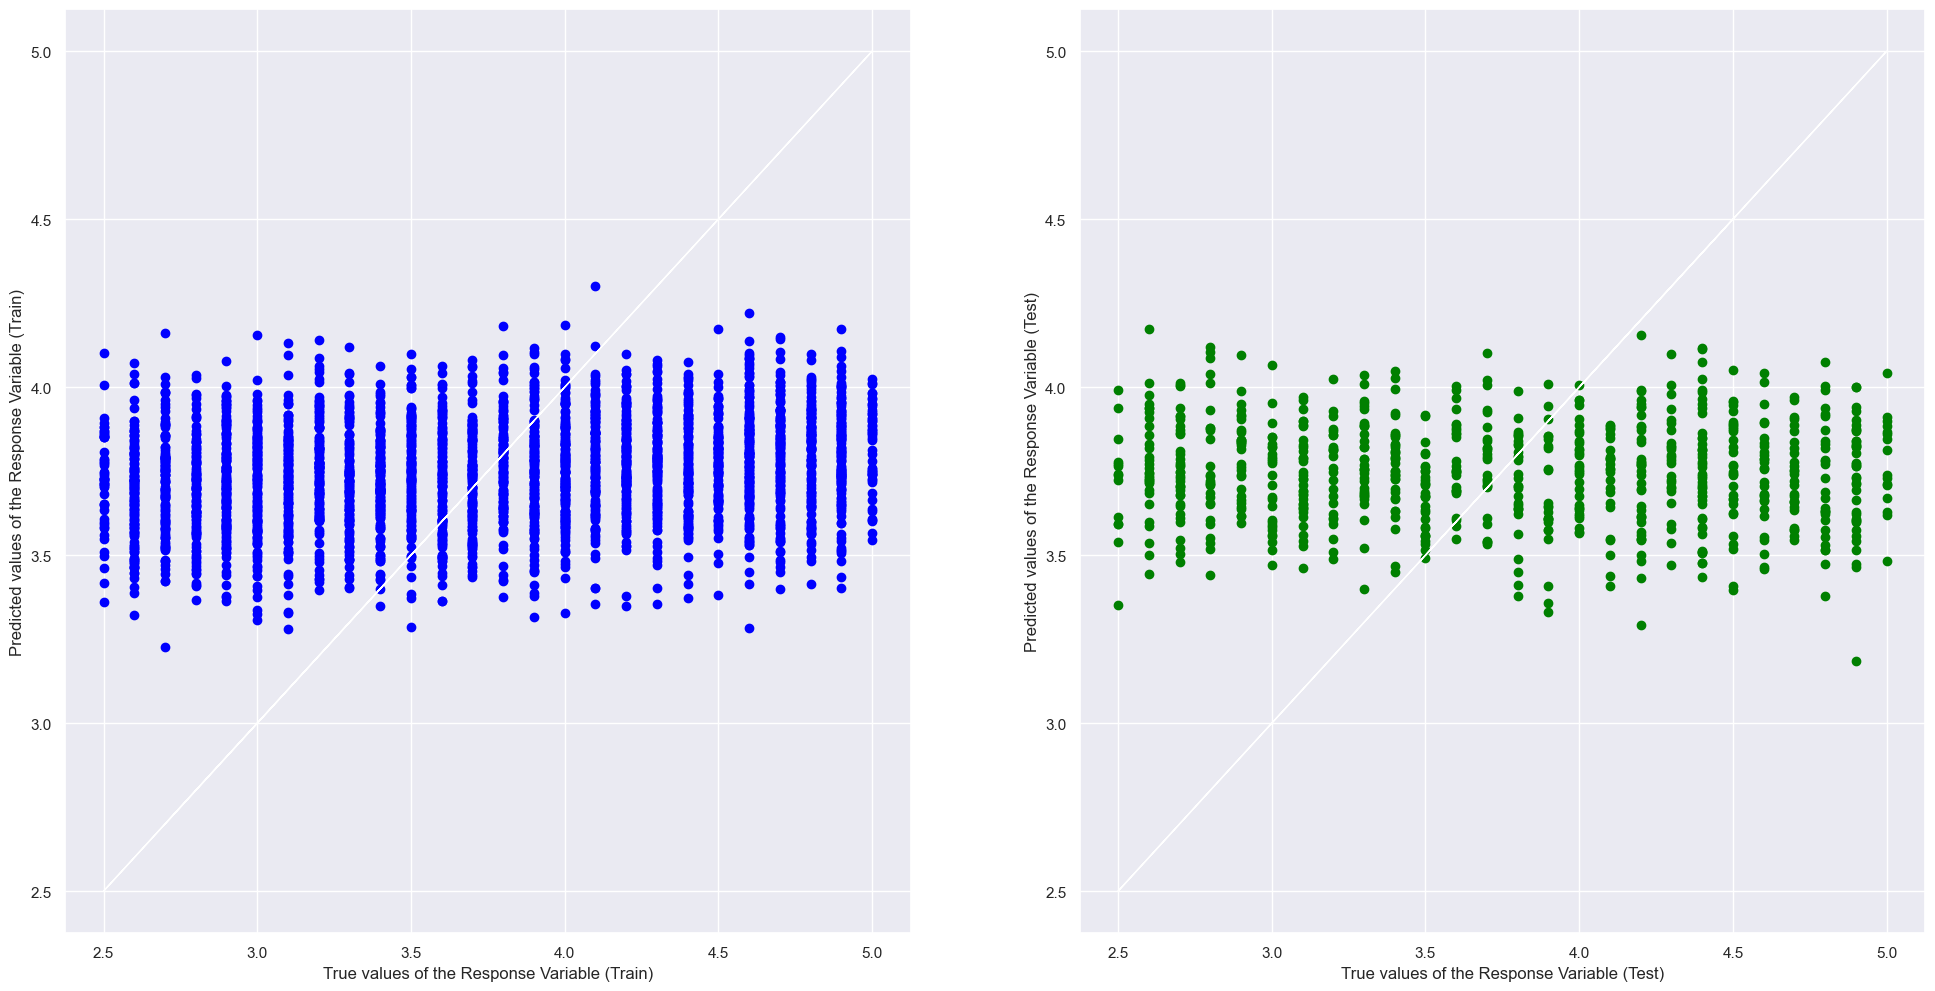

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)


#Linear Regression using Train Data
model = LinearRegression() #Create the Linear Regression Object
model.fit(X_train,y_train) #Train the Linear Regression Model



# Predict IMDb values from Predictors
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [28]:
# print the intercept
print(model.intercept_)



37708188374.76254


In [29]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.04641238661233971
Mean Squared Error (MSE) 	: 0.48375367576274303

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.05998616765030862
Mean Squared Error (MSE) 	: 0.566931545910309



In [30]:
#Prediction of review rate for a few customers

In [39]:
# List of Customer IDs you are interested in
customer_ids = [30, 45, 60, 369, 500]

# Extract rows where 'Customer ID' is in customer_ids list
data_pred = Z[Z["Customer ID"].isin(customer_ids)]

# Display the extracted DataFrame
data_pred

,Customer ID,Age,Purchase Amount (USD),Previous Purchases,Gender_Female,Gender_Male,Category_Accessories,Category_Clothing,Category_Footwear,Category_Outerwear,...,Item Purchased_Scarf,Item Purchased_Shirt,Item Purchased_Shoes,Item Purchased_Shorts,Item Purchased_Skirt,Item Purchased_Sneakers,Item Purchased_Socks,Item Purchased_Sunglasses,Item Purchased_Sweater,Item Purchased_T-shirt
29,30,31,48,14,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
44,45,39,53,45,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59,60,63,79,4,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
368,369,24,39,29,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
499,500,36,99,24,False,True,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False


In [40]:
#result of prediction

In [41]:
X_pred = pd.DataFrame(data_pred[ColumnList])



predictions = model.predict(X_pred)
predictions

array([3.84963226, 3.84562683, 4.01502991, 3.65206909, 3.81607819])

In [42]:

data_pred['Review Rating'] = data['Review Rating'].loc[data_pred.index]

# add the predictions and summarize
predictions = pd.DataFrame(predictions, columns=["Pred_Review Rating"], index=data_pred.index)
data_acc = pd.concat([data_pred[["Customer ID", "Review Rating"]], predictions], axis=1)

print(data_acc)

     Customer ID  Review Rating  Pred_Review Rating
29            30            4.1            3.849632
44            45            4.6            3.845627
59            60            4.6            4.015030
368          369            4.5            3.652069
499          500            4.8            3.816078


C:\Users\user\AppData\Local\Temp\ipykernel_40472\3676405247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred['Review Rating'] = data['Review Rating'].loc[data_pred.index]


In [43]:
data_acc

,Customer ID,Review Rating,Pred_Review Rating
29,30,4.1,3.849632
44,45,4.6,3.845627
59,60,4.6,4.015030
368,369,4.5,3.652069
499,500,4.8,3.816078


In [44]:
#The percentage error of prediction error to real review rate

In [45]:

# Calculate the percentage errors
review_rating_errors = 100 * abs(data_acc["Review Rating"] - data_acc["Pred_Review Rating"]) / data_acc["Review Rating"]
review_rating_errors = pd.DataFrame(review_rating_errors, columns=["Error"], index=data_acc.index)

# Concatenate the error dataframe with the main dataframe
data_acc = pd.concat([data_acc, review_rating_errors], axis=1)

# Display the final DataFrame with the errors
print(data_acc)

     Customer ID  Review Rating  Pred_Review Rating      Error
29            30            4.1            3.849632   6.106530
44            45            4.6            3.845627  16.399417
59            60            4.6            4.015030  12.716741
368          369            4.5            3.652069  18.842909
499          500            4.8            3.816078  20.498371
